In [1]:
#1.1 Install dependencies

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Malo\anaconda3\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "C:\Users\Malo\anaconda3\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Malo\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Malo\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Malo\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.time


  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)


  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 128, in <genexpr>
    return (c for c in iterator if id(c) not in self._incompatible_ids)
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\found_candidates.py", line 32, in _iter_built
    candidate = func()
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\factory.py", line 204, in _make_candidate_from_link
    self._link_candidate_cache[link] = LinkCandidate(
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 295, in __init__
    super().__init__(
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 156, in __init__
    self.dist = self._prepare()
  File "C:\Users\Malo\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 227, in _prepare
    dist = self._prepare

In [3]:
import tensorflow as tf
import os


In [4]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [5]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU') #Pour eviter des erreus et consomation excessive de GPU
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
import cv2
import imghdr
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [ ]:
img = cv2.imread(os.path.join('dataset_images', 'messenger', '20221117_125310_4.png'))

In [ ]:
img.shape

In [ ]:
plt.imshow(img)

In [ ]:
data_dir = 'dataset_images'

In [271]:
os.listdir(os.path.join(data_dir, 'messenger'))

['.ipynb_checkpoints',
 '20221117_125310_11.png',
 '20221117_125310_12.png',
 '20221117_125310_13.png',
 '20221117_125310_14.png',
 '20221117_125310_4.png',
 '20221117_125310_5.png',
 '20221117_125310_6.png',
 '20221117_125310_7.png',
 '20221117_125310_8.png',
 '20221117_125310_9.png']

In [272]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [273]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [277]:
image_exts[1]

'jpg'

In [278]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

.ipynb_checkpoints
20221117_125310_10.png
20221117_125310_11.png
20221117_125310_12.png
20221117_125310_13.png
20221117_125310_14.png
20221117_125310_4.png
20221117_125310_5.png
20221117_125310_6.png
20221117_125310_7.png
20221117_125310_8.png
20221117_125310_9.png
20221117_113554_10.png
20221117_113554_11.png
20221117_113554_12.png
20221117_113554_13.png
20221117_113554_14.png
20221117_113554_15.png
20221117_113554_16.png
20221117_113554_17.png
20221117_113554_18.png
20221117_113554_19.png
20221117_113554_20.png
20221117_113554_21.png
20221117_113554_22.png
20221117_113554_23.png
20221117_113554_24.png
20221117_113554_28.png
20221117_113554_31.png
20221117_113554_4.png
20221117_113554_5.png
20221117_113554_6.png
20221117_113554_7.png
20221117_113554_8.png
20221117_113554_9.png
20221117_125310_15.png
20221117_125310_16.png
20221117_125310_17.png
20221117_125310_18.png
20221117_113554_1.png
20221117_113554_25.png
20221117_113554_26.png
20221117_113554_27.png
20221117_113554_29.png
20221

In [280]:
 #Remotion des images corrompues
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'. format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image dataset_images\messenger\.ipynb_checkpoints


In [185]:
#charger data

In [186]:
tf.data.Dataset??

In [281]:
import numpy as np 
from matplotlib import pyplot as plt

In [282]:
data = tf.keras.utils.image_dataset_from_directory('dataset_images')

Found 44 files belonging to 6 classes.


In [283]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [284]:
data_iterator = data.as_numpy_iterator()

In [285]:
data_iterator

In [286]:
#Autre batch de l'iterateur 
batch = data_iterator.next()

In [287]:
#Images representés comme numpys arrays
batch[0].shape

(32, 256, 256, 3)

In [310]:
batch[1]

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2, 2, 1,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 2])

In [ ]:
#JE PENSE QUE:
# 1 -> twitch
# 2 -> noise
# 3 -> messenger 

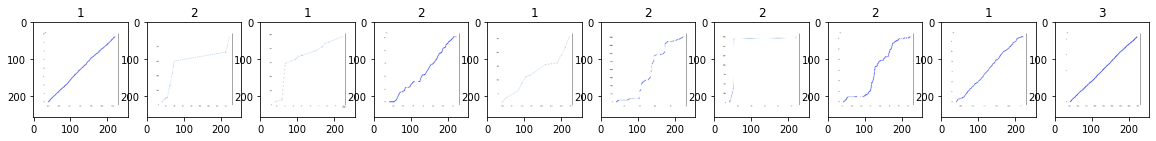

In [313]:
fig, ax = plt.subplots(ncols=10, figsize= (20,20))
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [295]:
#Preprocessing data

In [197]:
scaled = batch[0]/255

In [198]:
scaled.max()

1.0

In [199]:
data = data.map(lambda x,y: (x/255, y)) #il y a plusieurs moyens de le faire

In [200]:
scaled_iterator = data.as_numpy_iterator()

In [201]:
batch= scaled_iterator.next()

In [202]:
batch[0].max()

1.0

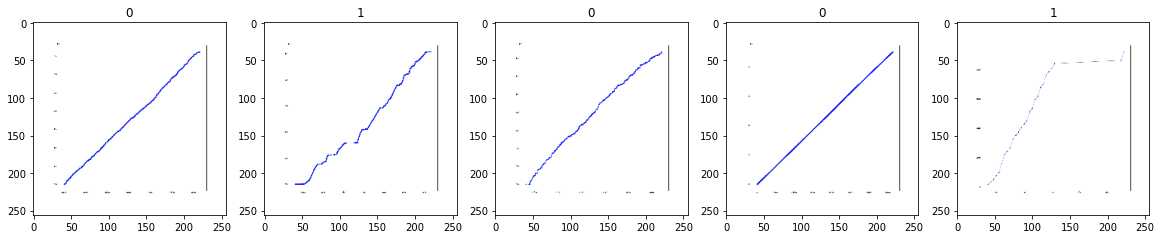

In [203]:
fig, ax = plt.subplots(ncols=5, figsize= (20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [204]:
#Split Data

In [205]:
len(data)

2

In [206]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+0
test_size = int(len(data)*.1)+1

In [207]:
train_size+val_size+test_size

2

In [208]:
train = data.take(train_size)
val =data.skip(train_size).take(val_size)
test= data.skip(train_size + val_size).take(test_size)

In [209]:
len(test)

1

In [210]:
#modeling

In [211]:
#Deep learning model

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [213]:
model = Sequential()

In [214]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D()) #Adding a convultion layer

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D()) #

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # Ici mettre 3, en effet on a  sorties sinon tu fais une regression #RQ MALO#
#RQ MALO# Il faut aussi que tes label soient des vecteurs du type : 
#[1,0,0] pour twitch, 
#[0,1,0] pour noise,
#[0,0,1] pour messenger

# Pour modifier tes labels, utilises du one hot encoding : 
# https://www.tensorflow.org/api_docs/python/tf/one_hot

In [215]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [216]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [217]:
#Train

In [218]:
logdir = 'logs'

In [219]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [220]:
hist = model.fit(train, epochs =20, validation_data = val, callbacks =[tensorboard_callback])

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.5500 - accuracy: 0.5625
Epoch 2/20
1/1 [==============================] - 1s 826ms/step - loss: 0.6988 - accuracy: 0.6562
Epoch 3/20
1/1 [==============================] - 1s 853ms/step - loss: 1.8140 - accuracy: 0.5625
Epoch 4/20
1/1 [==============================] - 1s 843ms/step - loss: 4.2743 - accuracy: 0.5312
Epoch 5/20
1/1 [==============================] - 1s 849ms/step - loss: 3.1810 - accuracy: 0.6562
Epoch 6/20
1/1 [==============================] - 1s 953ms/step - loss: 1.4998 - accuracy: 0.6875
Epoch 7/20
1/1 [==============================] - 1s 874ms/step - loss: 0.2777 - accuracy: 0.6250
Epoch 8/20
1/1 [==============================] - 1s 840ms/step - loss: 1.5849 - accuracy: 0.2500
Epoch 9/20
1/1 [==============================] - 1s 881ms/step - loss: 0.9924 - accuracy: 0.2500
Epoch 10/20
1/1 [==============================] - 1s 869ms/step - loss: 0.4708 - accuracy: 0.6250
Epoch 11/20
1/1 [=====

In [221]:
hist.history

{'loss': [0.5499953031539917,
  0.698840856552124,
  1.8140050172805786,
  4.274260997772217,
  3.1810364723205566,
  1.499804973602295,
  0.2777084708213806,
  1.584892749786377,
  0.9924193620681763,
  0.47075626254081726,
  0.37596943974494934,
  0.23395174741744995,
  0.6847317814826965,
  0.2560846507549286,
  0.6177017092704773,
  0.25397372245788574,
  0.4647600054740906,
  0.33687490224838257,
  0.32038116455078125,
  0.16078713536262512],
 'accuracy': [0.5625,
  0.65625,
  0.5625,
  0.53125,
  0.65625,
  0.6875,
  0.625,
  0.25,
  0.25,
  0.625,
  0.6875,
  0.625,
  0.625,
  0.625,
  0.59375,
  0.625,
  0.625,
  0.59375,
  0.59375,
  0.65625]}

In [222]:
#Perfomance

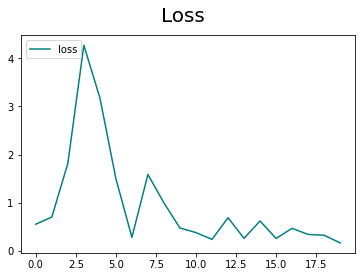

In [223]:
fig =plt.figure()
plt.plot(hist.history['loss'], color ='teal', label ='loss')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

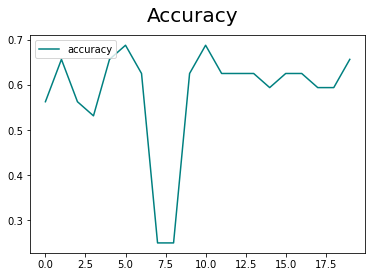

In [224]:
fig =plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label ='accuracy')
#plt.plot(hist.history['val_loss'], color= 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize =20)
plt.legend(loc ="upper left")
plt.show()

In [225]:
#Evaluate Performance

In [226]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [227]:
pre = Precision()
re =Recall()
acc = BinaryAccuracy()

In [228]:
for batch in test.as_numpy_iterator():
    x, y = batch 
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 149ms/step


In [229]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.75, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.5833333, shape=(), dtype=float32)


In [230]:
#Test
import cv2

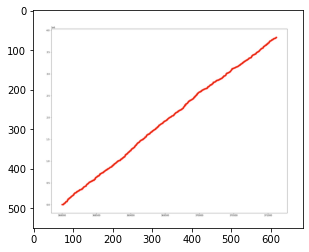

In [314]:
img = cv2.imread('teste/teste_messenger.png')
plt.imshow(img)
plt.show()

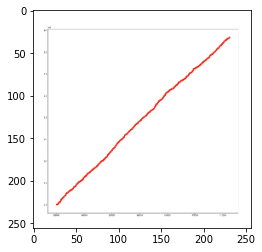

In [315]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [316]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 25

In [317]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 30ms/step


In [318]:
yhat #RQ MALO# la tu devrais avoir une sortie de type [0.816,0.154,0.260], chaque valeur correspond à la probabilité que ce soit telle ou telle classe
# Afin d'afficher la classe il faut donc appliquer la fonction argmax

array([[0.89753515]], dtype=float32)

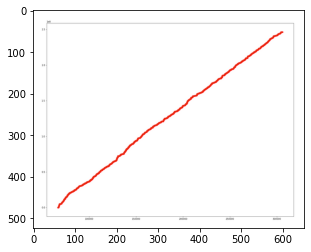

In [319]:
img = cv2.imread('teste/teste_twitch.png')
plt.imshow(img)
plt.show()

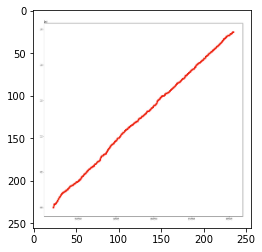

In [320]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [321]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [322]:
yhat

array([[0.8975824]], dtype=float32)

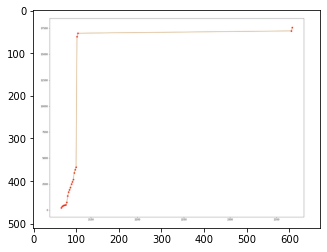

In [323]:
img = cv2.imread('teste/teste_noise.png')
plt.imshow(img)
plt.show()

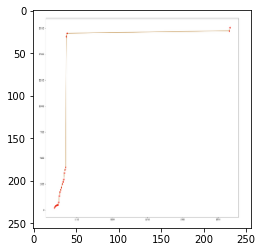

In [324]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [325]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 26ms/step


In [326]:
yhat

array([[0.8947023]], dtype=float32)